# Image Classification of MNIST Fashion using a Multilayer Perceptron v3

Example followed from https://www.tensorflow.org/tutorials/keras/classification.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize the data between 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

# List of corresponding class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


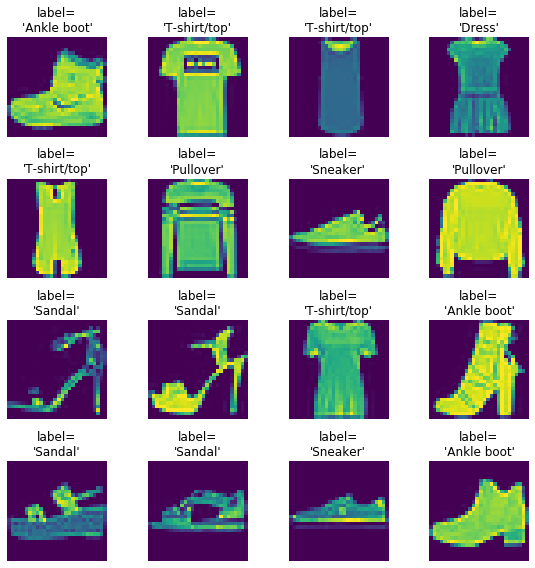

In [4]:
plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_train[i])
    plt.axis("off")
    plt.title("label=\n'{}'".format(class_names[y_train[i]]))
# plt.suptitle("Example Training Images")
plt.tight_layout()
plt.show()

In [5]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(1024, activation="relu"))
model.add(tf.keras.layers.Dense(512, activation="relu"))
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(10))

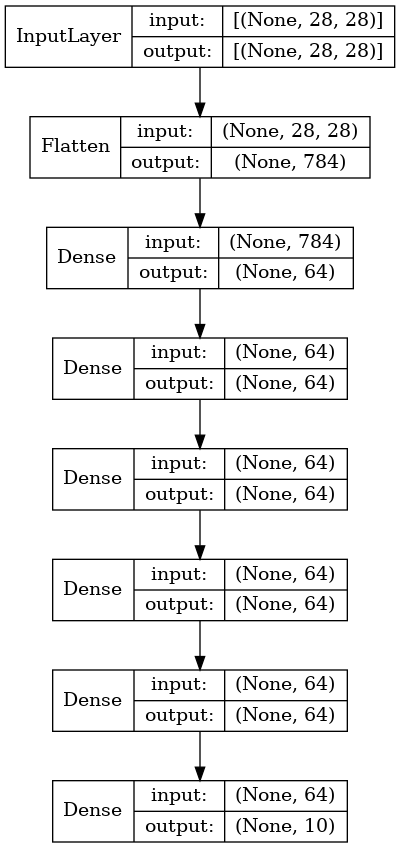

In [6]:
tf.keras.utils.plot_model(model, to_file="/tmp/model.png", show_shapes=True, show_layer_names=False)

In [7]:
# Examine the raw "logit" score of the untrained model for each class
predictions = model(x_train[0:1]).numpy()
predictions

array([[-0.02617815,  0.02222431, -0.01818789, -0.11310458,  0.08100363,
         0.02197415, -0.14775869, -0.18982637,  0.09258601, -0.07161094]],
      dtype=float32)

In [8]:
# Convert the "logit" scores into probabilities
tf.nn.softmax(predictions).numpy()

array([[0.10047146, 0.10545414, 0.10127747, 0.09210666, 0.11183846,
        0.10542776, 0.08896946, 0.08530435, 0.11314134, 0.0960089 ]],
      dtype=float32)

In [9]:
loss_func = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

loss_func(y_train[0:1], predictions).numpy()

2.3433144

In [10]:
model.compile(optimizer="adam", loss=loss_func, metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5541 - accuracy: 0.8033 - val_loss: 0.4076 - val_accuracy: 0.8528
Epoch 2/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3948 - accuracy: 0.8549 - val_loss: 0.4027 - val_accuracy: 0.8507
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3598 - accuracy: 0.8687 - val_loss: 0.3936 - val_accuracy: 0.8573
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3362 - accuracy: 0.8764 - val_loss: 0.3709 - val_accuracy: 0.8677
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3183 - accuracy: 0.8828 - val_loss: 0.3488 - val_accuracy: 0.8700
Epoch 6/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3029 - accuracy: 0.8877 - val_loss: 0.3458 - val_accuracy: 0.8770
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2919 - accuracy: 0.8920 - val_loss: 0.3348 - val_accuracy:

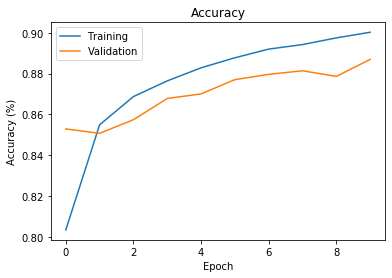

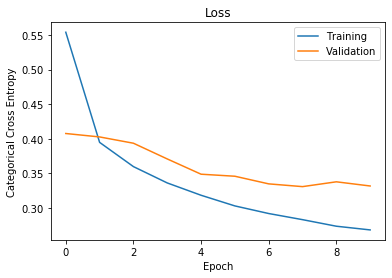

In [11]:
plt.figure()
plt.plot(history.history["accuracy"], label="Training")
plt.plot(history.history["val_accuracy"], label="Validation")
plt.title("Accuracy")
plt.ylabel("Accuracy (%)")
plt.xlabel("Epoch")
plt.legend()

plt.figure()
plt.plot(history.history["loss"], label="Training")
plt.plot(history.history["val_loss"], label="Validation")
plt.title("Loss")
plt.ylabel("Categorical Cross Entropy")
plt.xlabel("Epoch")
plt.legend()

plt.show()

In [12]:
model.evaluate(x_train, y_train, verbose=2)

1875/1875 - 1s - loss: 0.2611 - accuracy: 0.9069


[0.2610507309436798, 0.9069333076477051]

In [13]:
model(x_test[0:1])

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[-4.3397427, -6.837787 , -6.7191935, -8.4689245, -8.503358 ,
        -0.3477813, -4.6578913,  3.059144 , -3.3514872,  6.9058065]],
      dtype=float32)>

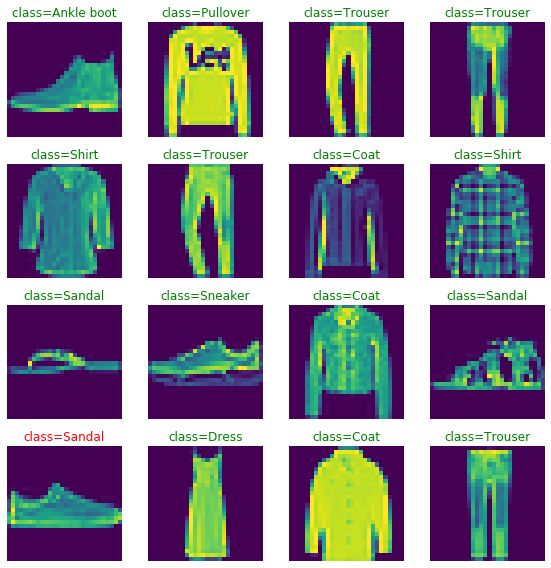

In [14]:
plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_test[i])
    plt.axis("off")
    classification = np.argmax(model(x_test[i:i+1]))
    color = "g" if classification == y_test[i] else "r"
    plt.title("class={}".format(class_names[classification]), fontdict={"color": color})
# plt.suptitle("Example Test Images")
plt.tight_layout()
plt.show()